In [1]:
# import Python Libraries
import numpy as np
import math 
import random
from matplotlib import pyplot as plt

In [2]:
classes = np.array([[1, 0, 0, 0], [0, 1, 0, 0],  [0, 0, 1, 0], [0, 0, 0, 1]])

for i in range(4000):
    x = np.array([[np.random.uniform(-1000.0, 1000.0)]])
    y = np.array([[np.random.uniform(-1000.0, 1000.0)]])
    if x > 0 and y > 0:
        sample_class = classes[0]
    elif x < 0 and y > 0:
        sample_class = classes[1]
    elif x < 0 and y < 0:
        sample_class = classes[2]
    elif x > 0 and y < 0:
        sample_class = classes[3]
        
    coor = np.concatenate([x, y])
    
    new_sample = np.array([[coor, sample_class]], dtype=object)
    if i == 0:
        training_sample = np.concatenate([new_sample])
    else:
        training_sample = np.concatenate((training_sample, new_sample))

In [3]:
for i in range(1000):
    x = np.array([[np.random.uniform(-1000.0, 1000.0)]])
    y = np.array([[np.random.uniform(-1000.0, 1000.0)]])
    if x > 0 and y > 0:
        sample_class = classes[0]
    elif x < 0 and y > 0:
        sample_class = classes[1]
    elif x < 0 and y < 0:
        sample_class = classes[2]
    elif x > 0 and y < 0:
        sample_class = classes[3]
        
    coor = np.concatenate([x, y])
    
    new_sample = np.array([[coor, sample_class]], dtype=object)
    if i == 0:
        testing_sample = np.concatenate([new_sample])
    else:
        testing_sample = np.concatenate((testing_sample, new_sample))

In [4]:
train_data2 = []
for i in range(len(training_sample)):
    new_array = training_sample[i][0].reshape(2)
    if i == 0:
        train_data2 = np.stack([new_array])
    else:    
        train_data2 = np.vstack([train_data2, new_array])

train_target_class = np.array([x[1] for x in training_sample])

print(train_data2)
print(train_target_class)

[[-322.80921385 -964.30004777]
 [-955.74007119 -202.9129595 ]
 [ 275.82164396  493.03191336]
 ...
 [ 698.29538419  676.63184191]
 [-978.64358748  309.71339591]
 [ 240.18239768 -707.35810357]]
[[0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]


In [5]:
test_data2 = []
for i in range(len(testing_sample)):
    new_array = testing_sample[i][0].reshape(2)
    if i == 0:
        test_data2 = np.stack([new_array])
    else:    
        test_data2 = np.vstack([test_data2, new_array])

test_target_class = np.array([x[1] for x in testing_sample])

print(test_data2)
print(test_target_class)

[[ 893.07432902  317.88630642]
 [ 549.23843096  291.53105604]
 [ 713.32726615 -663.01853439]
 ...
 [-151.2524874   -90.31331834]
 [-420.39065619  478.64942638]
 [-165.56804801  639.60656395]]
[[1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]]


In [6]:
import pandas as pd

class Diagram(object):
    def __init__(self , classifier):
        self.classifier = classifier
    def draw(self , xlabel = '' , ylabel = '' , legend_loc = '' , title = ''):
        self.training_progress_diagram()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend(loc=legend_loc)
        plt.show()
    def training_progress_diagram(self):
        cost = self.classifier.cost
        plt.plot(range(1 , len(cost) + 1) , cost , 'b-')

In [7]:
class BPNN(object):
    def __init__(self, train_data, target, lr, n_iter):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.n_iter = n_iter
        self.setup()
        self.cost = []
        self.diagram = Diagram(self)
    def setup(self):
        self.set_nn_architecture()
        self.set_weight()
    
    # step1
    def set_nn_architecture(self):
        # ex: 2, 3, 4
        self.input_node = self.train_data.shape[1] # 2
        self.output_node = self.target.shape[1] # 4
        self.hidden_node = int(math.ceil((self.input_node + self.output_node) / self.input_node)) # 3

        # bias
        self.hidden_bias = np.random.uniform(self.hidden_node) 
        self.output_bias = np.random.uniform(self.output_node)
    
    # step2
    def set_weight(self):
        self.w1 = np.random.uniform(-1, 1, size=(self.input_node , self.hidden_node))
        self.w2 = np.random.uniform(-1, 1, size=(self.hidden_node , self.output_node))
    
    # step3
    def predict(self , x , Y):
        # compute hidden layer
        self.h = self.sigmoid((np.dot(x , self.w1) + self.hidden_bias))
        # Hidden_layer_output <- w1·x + hidden_bias
        # compute output layer
        self.y = self.sigmoid((np.dot(self.h , self.w2) + self.output_bias)) 
        # Output_layer_output <- w2·x + output_bias
        
        # compute accuracy
        zy = np.where(self.y > 0.5 , 1 , 0)
        p_y = Y - zy
        self.acc = 0
        for i in p_y:
            if (i.sum() == 0):
                self.acc += 1
        self.acc = self.acc / Y.shape[0] * 100.0
        return zy
    
    # step4
    def Backpropagation(self):
        
        # compute MSE
        E = (self.target - self.y)
        errors = np.sum(np.square(E)) / (2)
        # MSE = (1/n) * ∑(y - y_hat)^2, n 對輸入輸出資料
        # self.target.shape[0] = 4
        
        # compute delta for output layer
        delta_y = self.y * (1 - self.y) * E
        # Y is Output_layer_output
        # delta_y = Y * (1-Y) * (Target - Y)
        
        # compute delta for hidden layer
        delta_h = self.h * (1 - self.h) * np.dot(delta_y , self.w2.T)
        # H is Hidden_layer_output
        # delta_h = H * (1-H) * (w2·delta_y)
        
        # adjust parameters
        self.w2 += self.lr * self.h.T.dot(delta_y)
        self.w1 += self.lr * self.train_data.T.dot(delta_h)
        self.y_b = self.lr * delta_y.sum()
        self.h_b = self.lr * delta_h.sum()
        return errors
    
    def train(self):
        self.error = 0
        for _iter in range(0 , self.n_iter):
            # forward
            self.predict(self.train_data , self.target)
            # backward
            self.error = self.Backpropagation()
            
            # Appending cost
            self.cost.append(self.error)
            if (_iter % 1000 == 0 and _iter != 0):
                print("epochs: " + str(_iter) + " Accuracy：%.2f" % self.acc)
                
            if (self.acc >= 98):
                return self
        return self
    
    def test(self, test_data, target):
        prediction = self.predict(test_data , target)
        print("Test set is :")
        print(test_data[:])
        print("\nPredicted values for Test set are")
        print(np.round(prediction))
        print("\n And actual y values for test set are")
        print(target)
        print("Accuracy = %r %%" %(self.acc))
        
        return self
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def draw(self , xlabel = '' , ylabel = '' , legend_loc = '' , title = ''):
        self.diagram.draw(xlabel , ylabel , legend_loc , title )

D:\Anaconda\Anaconda3\envs\ProjectTKU\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in exp
No handles with labels found to put in legend.


Accuracy = 99.02499999999999 % , iteration = 16 , MSE =  345.465


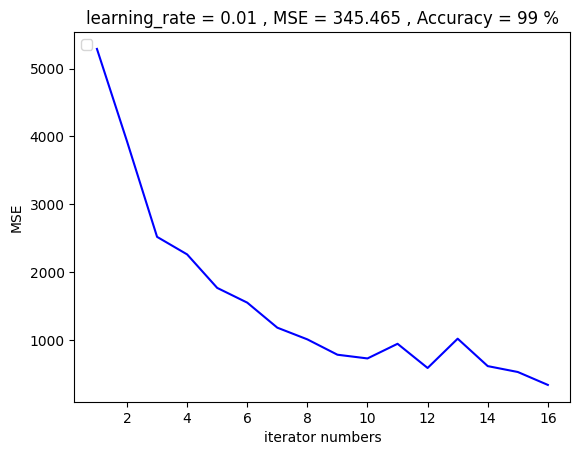

Test set is :
[[ 893.07432902  317.88630642]
 [ 549.23843096  291.53105604]
 [ 713.32726615 -663.01853439]
 ...
 [-151.2524874   -90.31331834]
 [-420.39065619  478.64942638]
 [-165.56804801  639.60656395]]

Predicted values for Test set are
[[1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]]

 And actual y values for test set are
[[1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]]
Accuracy = 98.5 %


In [9]:
bpn = BPNN(train_data2,  train_target_class, lr = 0.01, n_iter = 10000)
bpn.train()
print("Accuracy = %r %% , iteration = %r , MSE =  %.3f" %(bpn.acc , len(bpn.cost) , bpn.error))
bpn.draw( title = 'learning_rate = %r , MSE = %.3f , Accuracy = %.f %%' % (bpn.lr , bpn.error , bpn.acc),
        xlabel = 'iterator numbers' ,
        ylabel = 'MSE',
        legend_loc = 'upper left')

bpn.test(test_data2, test_target_class)